In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
import pickle
import joblib

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222666, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222665, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466,1.32465,17,2,1,0.00000,1.324640,0.00004,1.324635
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473,1.32469,17,2,1,0.00000,1.324675,0.00011,1.324663
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476,1.32480,17,2,1,-0.00005,1.324675,0.00017,1.324670
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481,1.32466,17,2,1,-0.00011,1.324700,0.00022,1.324723
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482,1.32512,17,2,1,0.00016,1.324695,0.00025,1.324717


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466,1.32465,17,2,1,0.00000,1.324640,0.00004,1.324635,-25.513075
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473,1.32469,17,2,1,0.00000,1.324675,0.00011,1.324663,-25.512686
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476,1.32480,17,2,1,-0.00005,1.324675,0.00017,1.324670,-25.512684
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481,1.32466,17,2,1,-0.00011,1.324700,0.00022,1.324723,-25.512796
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482,1.32512,17,2,1,0.00016,1.324695,0.00025,1.324717,-25.512686


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32462  1.32466         1.32465    17    2   
2020-01-01 17:05:00  1.32465  1.32462  1.32473         1.32469    17    2   
2020-01-01 17:10:00  1.32464  1.32459  1.32476         1.32480    17    2   
2020-01-01 17:15:00  1.32469  1.32459  1.32481         1.32466    17    2   
2020-01-01 17:20:00  1.32482  1.32457  1.32482         1.32512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000   1.324640  0.00004    1.324635 -25.513075  
2020-01-01 17:05:00     1   0.00000   1.324675  0.00011    1.324663 -25.512686  
2020-01-01 17:10:00     1  -0.00005   1.324675  0.00017    1.324670 -25.512684  
2020-01-01 17:15:00     1  -0.00011   1.324700  0.00022

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178132
178132
22000
22000
22533
22533


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178132, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178107, 24, 12)
(21975, 24, 12)
(22508, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178107, 1)
(21975, 1)
(22508, 1)


array([[0.6475849 ],
       [0.6488571 ],
       [0.64790297],
       ...,
       [0.39517307],
       [0.3953848 ],
       [0.39648008]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6475849 , 0.6488571 , 0.64790297, ..., 0.39517307, 0.3953848 ,
       0.39648008], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Thesis Dataset/GBP5minGRU1.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)


Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 279.5826 - mae: 4.7435 - mse: 279.5826 - root_mean_squared_error: 16.7207 - mape: 12440.0889
Epoch 1: val_mse improved from inf to 0.59873, saving model to /content/drive/MyDrive/Thesis Dataset/GBP5minGRU1.hdf5
463/463 [==============================] - 245s 516ms/step - loss: 279.5826 - mae: 4.7435 - mse: 279.5826 - root_mean_squared_error: 16.7207 - mape: 12440.0889 - val_loss: 0.5987 - val_mae: 0.7379 - val_mse: 0.5987 - val_root_mean_squared_error: 0.7738 - val_mape: 59273.8047
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.2199 - mae: 0.4039 - mse: 0.2199 - root_mean_squared_error: 0.4690 - mape: 7411.0957
Epoch 2: val_mse improved from 0.59873 to 0.12983, saving model to /content/drive/MyDrive/Thesis Dataset/GBP5minGRU1.hdf5
463/463 [==============================] - 234s 506ms/step - loss: 0.2199 - mae: 0.4039 - mse: 0.2199 - root_mean_squared_error: 0.4690 - mape: 7411.0957 - val_loss

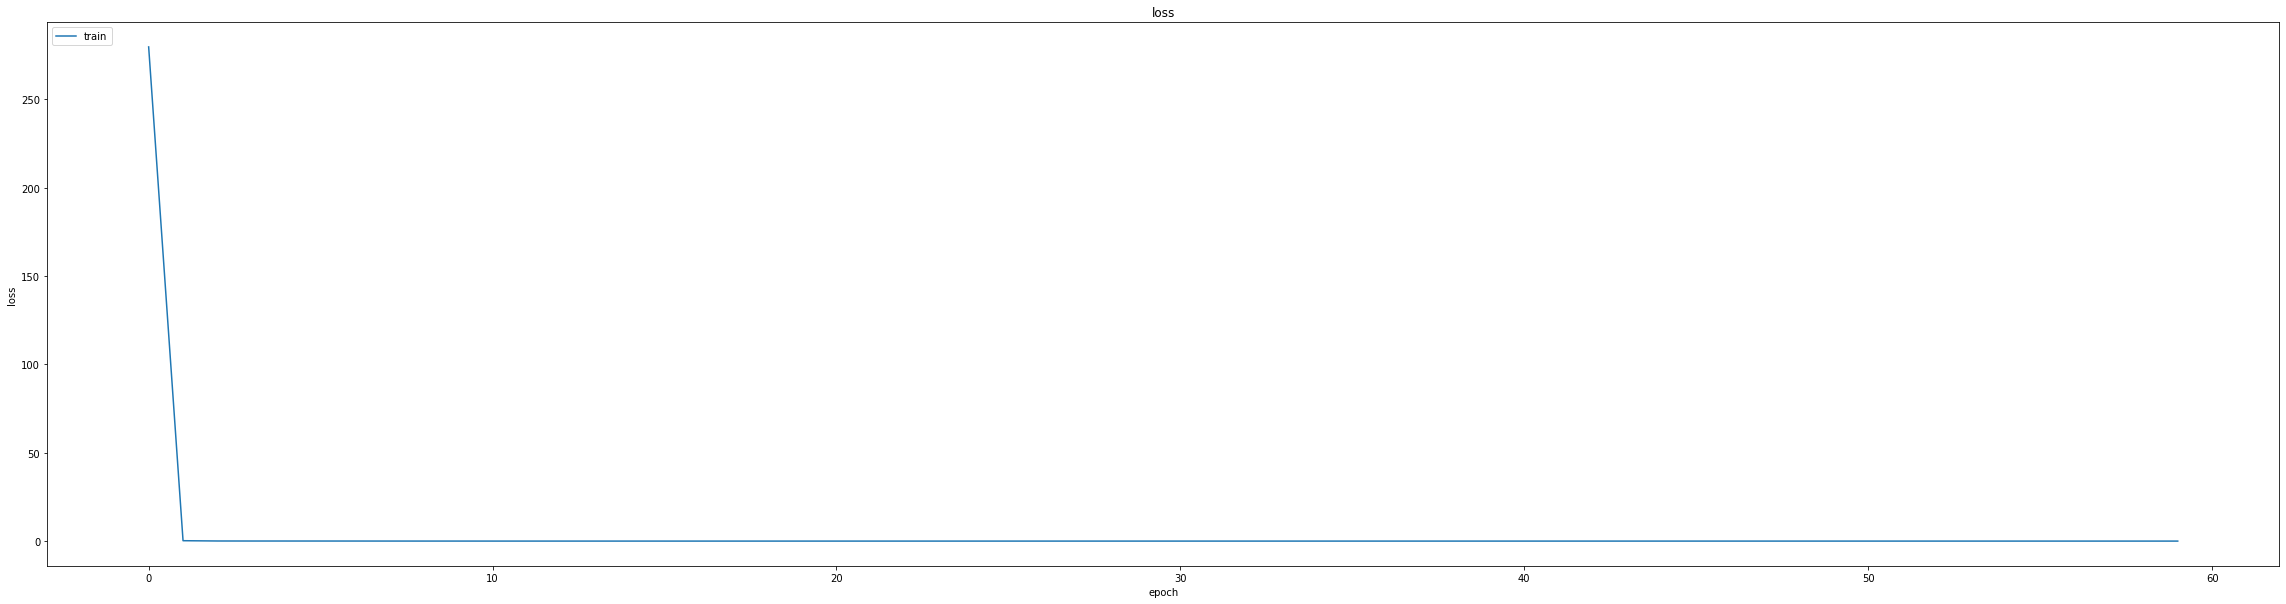

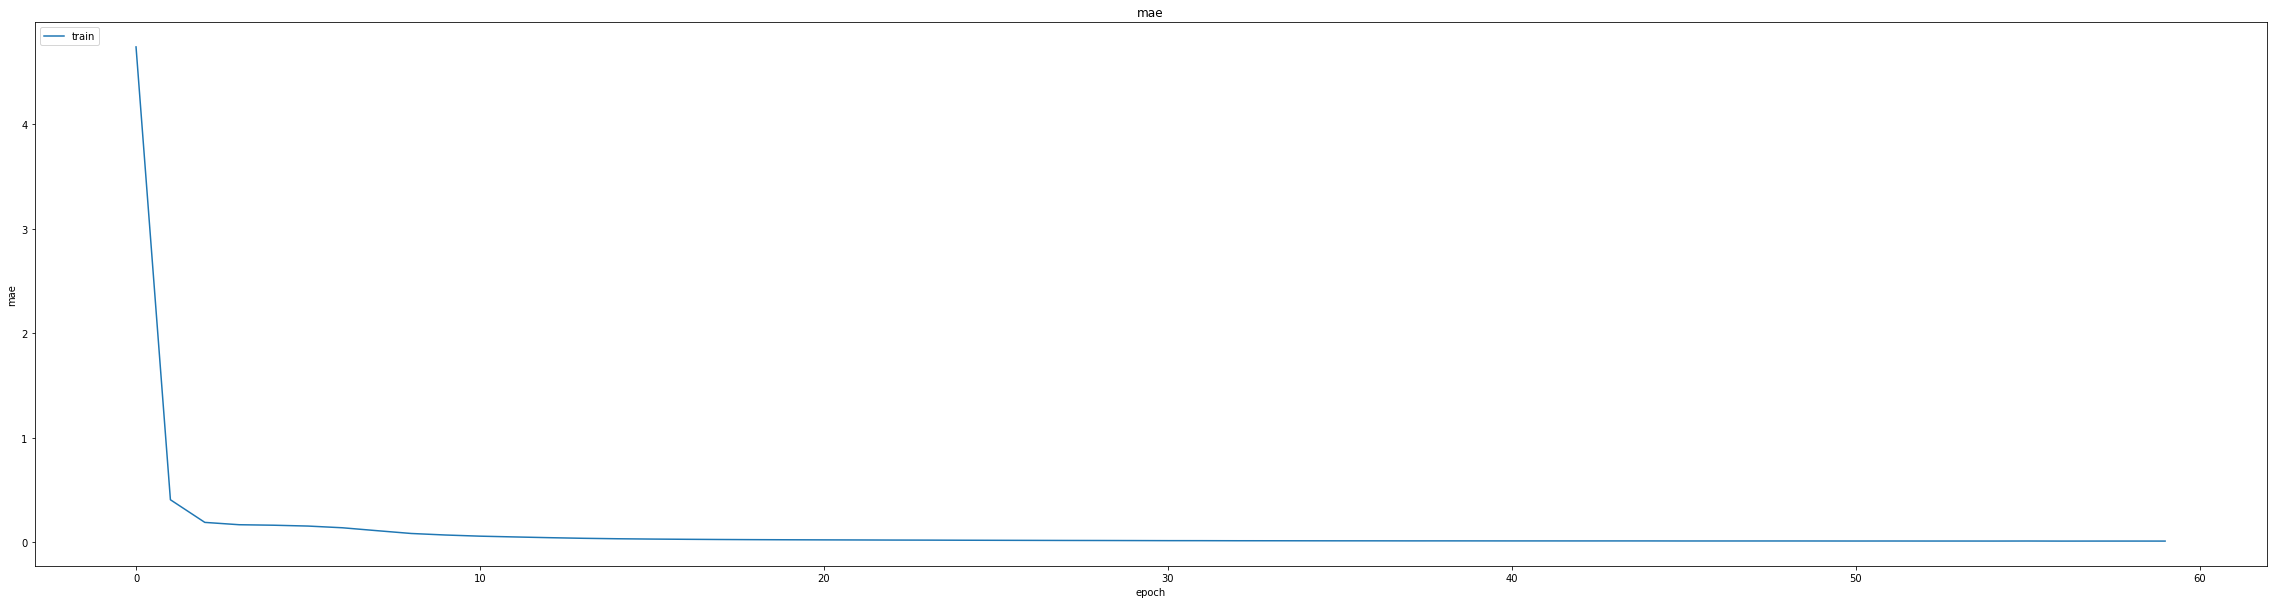

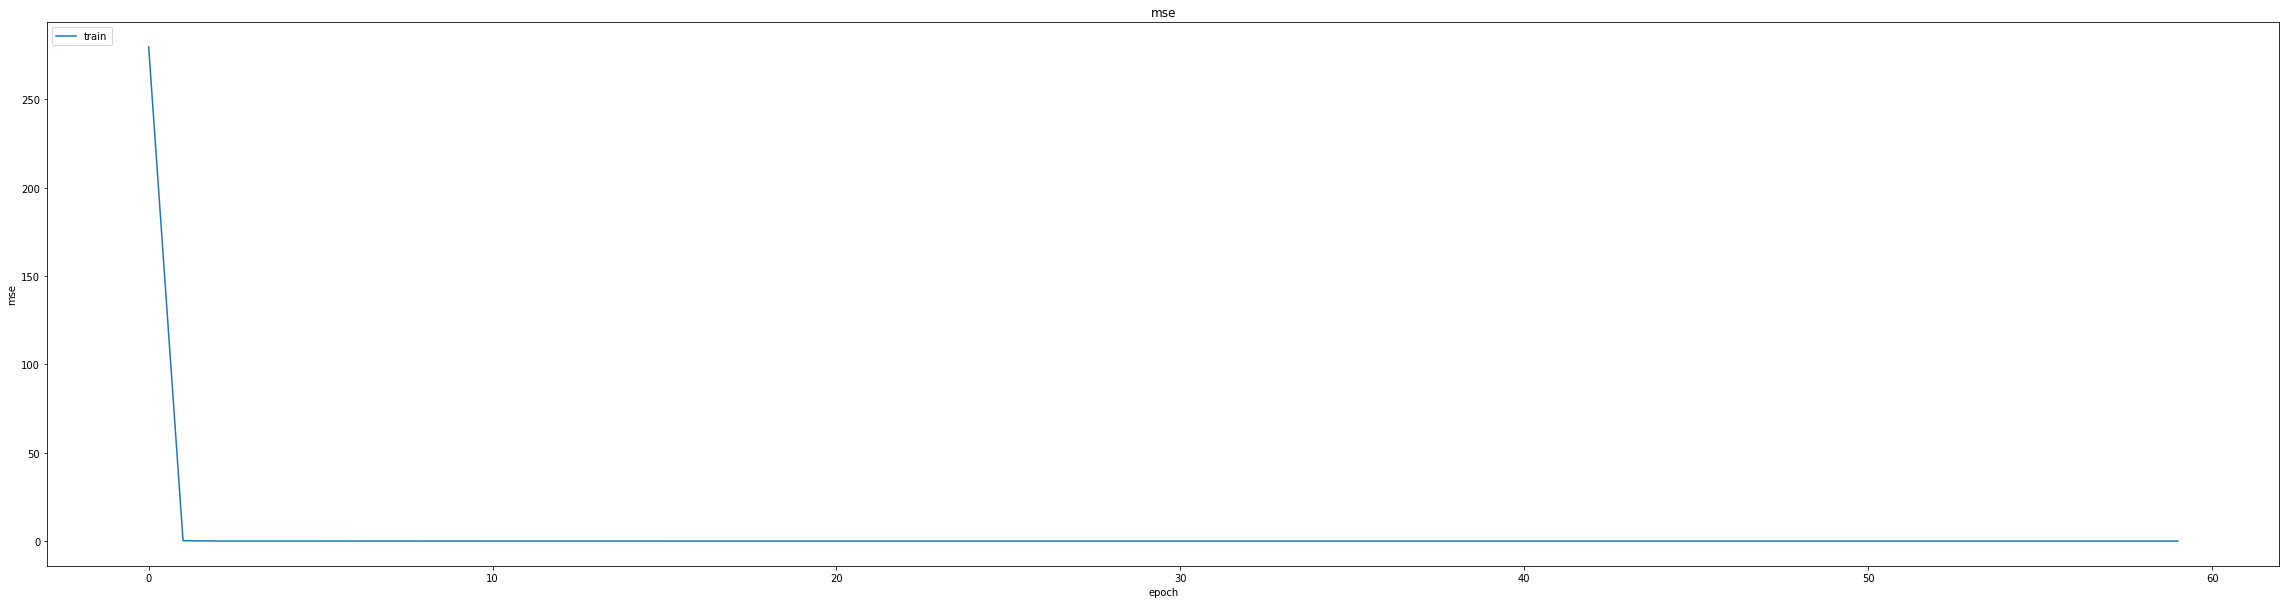

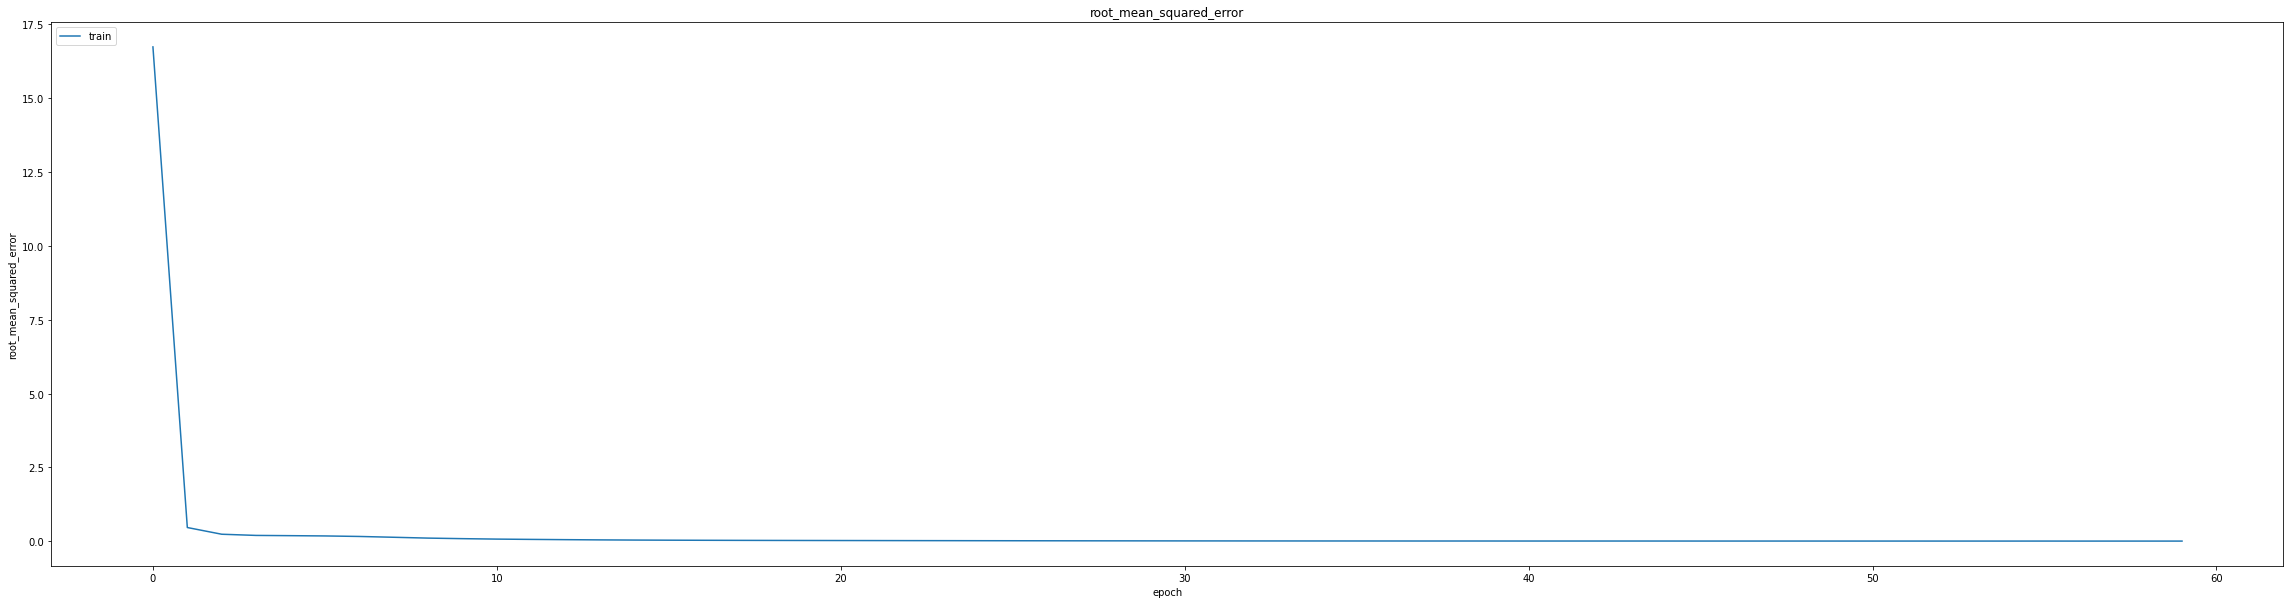

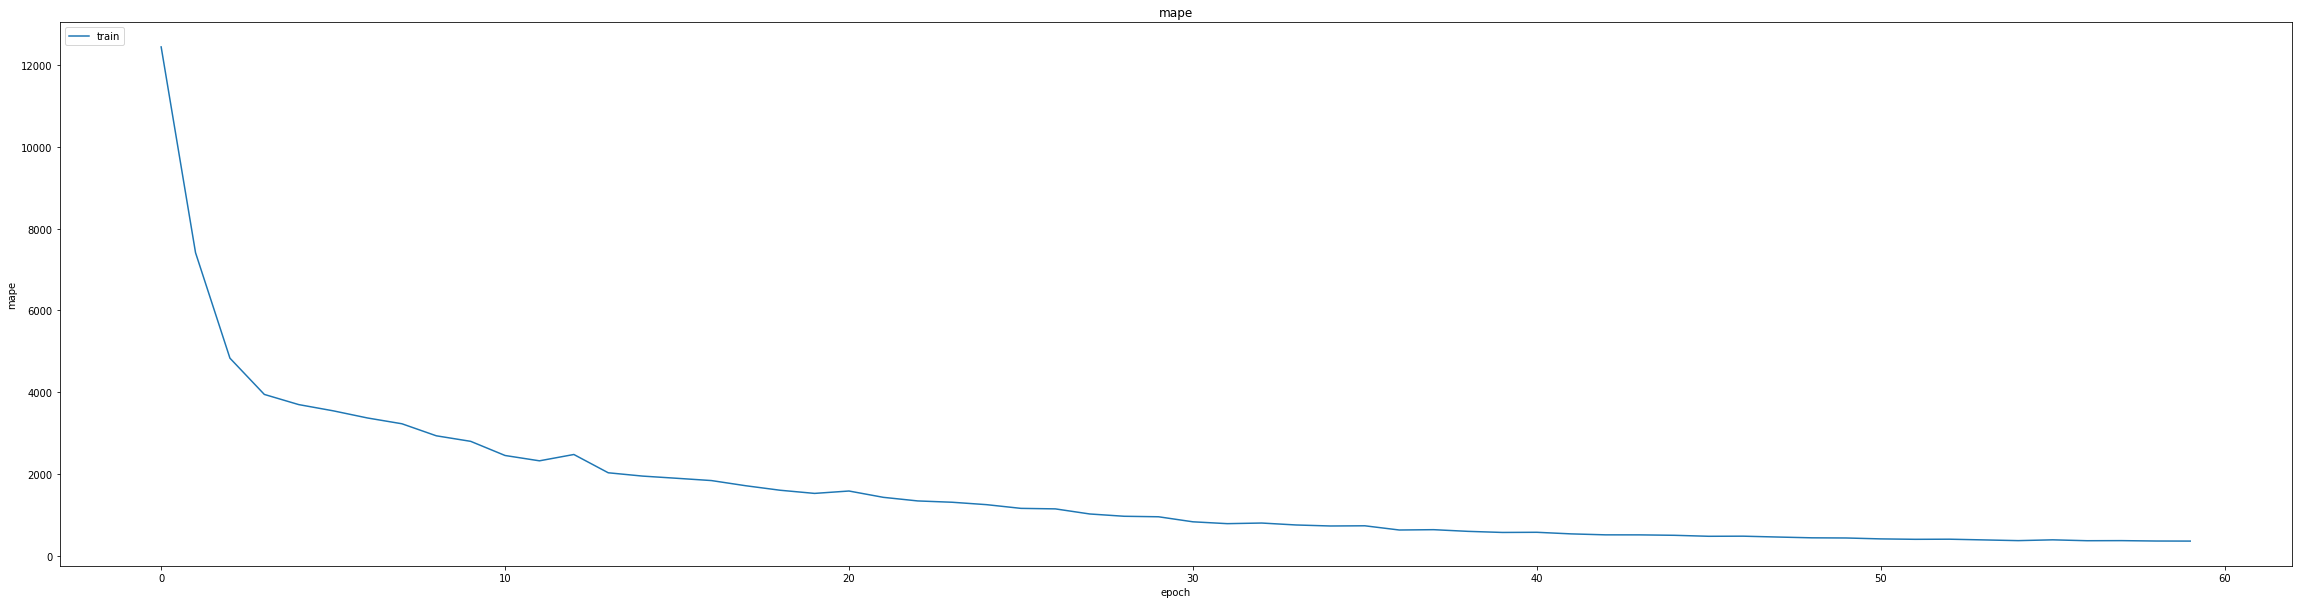

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015838483348488808
0.021800413727760315
687/687 [==============================] - 32s 45ms/step
0.9839878978793604


In [ ]:
model.load_weights("/content/drive/MyDrive/Thesis Dataset/GBP5minGRU1.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=20
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 4.0321e-04 - mae: 0.0103 - mse: 4.0321e-04 - root_mean_squared_error: 0.0201 - mape: 409.5310
Epoch 1: val_mse did not improve from 0.00048
463/463 [==============================] - 246s 518ms/step - loss: 4.0321e-04 - mae: 0.0103 - mse: 4.0321e-04 - root_mean_squared_error: 0.0201 - mape: 409.5310 - val_loss: 6.2616e-04 - val_mae: 0.0195 - val_mse: 6.2616e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 3643.9023 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 7.7085e-05 - mae: 0.0065 - mse: 7.7085e-05 - root_mean_squared_error: 0.0088 - mape: 364.1692
Epoch 2: val_mse did not improve from 0.00048
463/463 [==============================] - 235s 508ms/step - loss: 7.7085e-05 - mae: 0.0065 - mse: 7.7085e-05 - root_mean_squared_error: 0.0088 - mape: 364.1692 - val_loss: 6.0230e-04 - val_mae: 0.0195 - val_mse: 6.0230e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 3256.6450

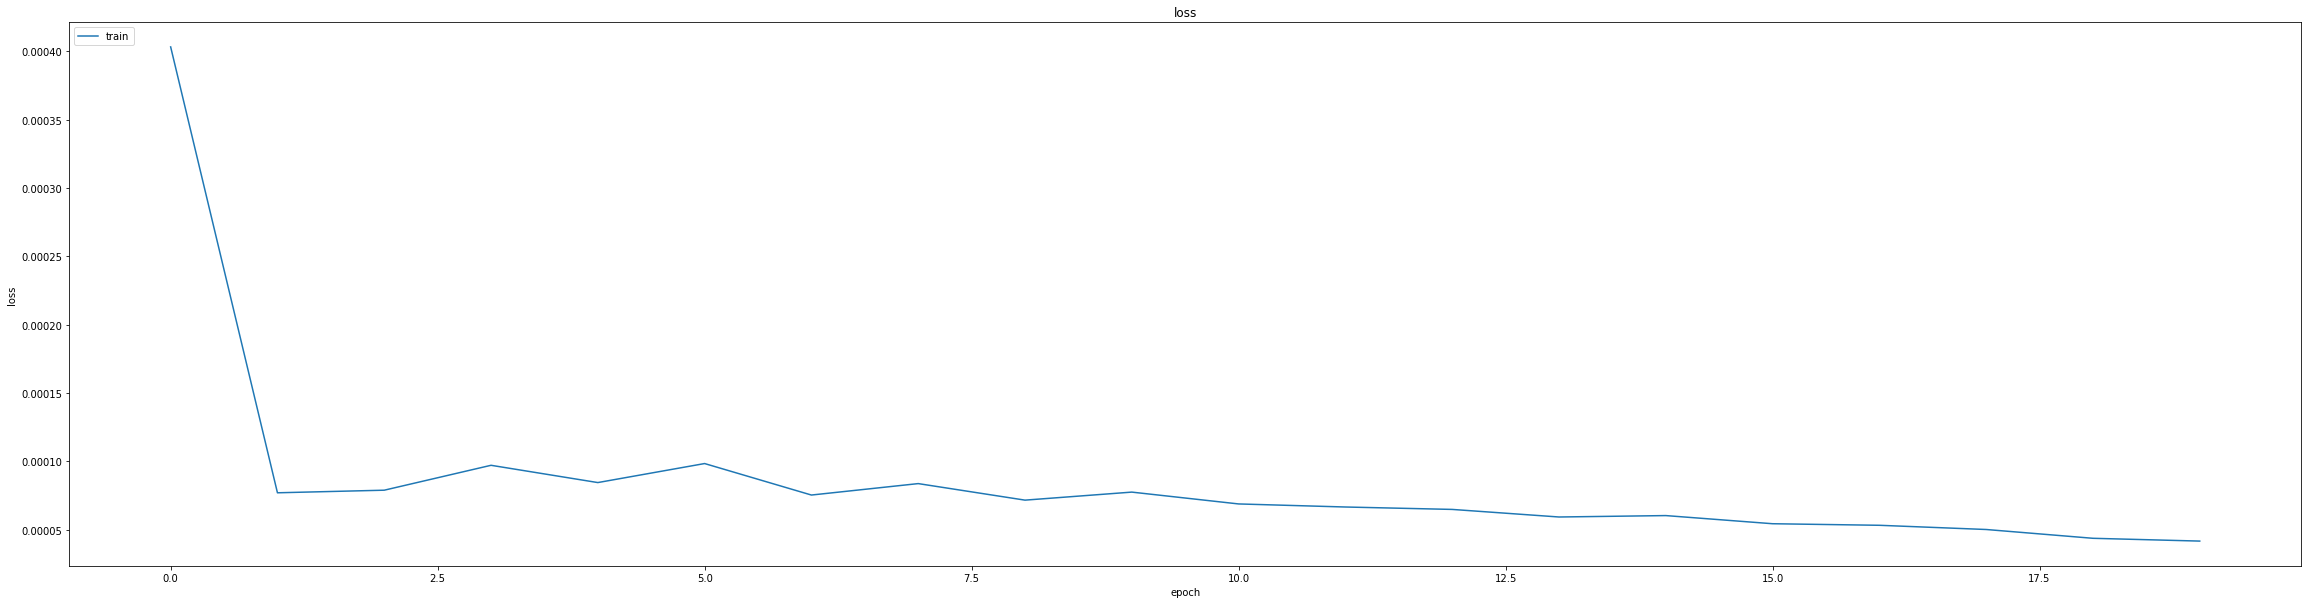

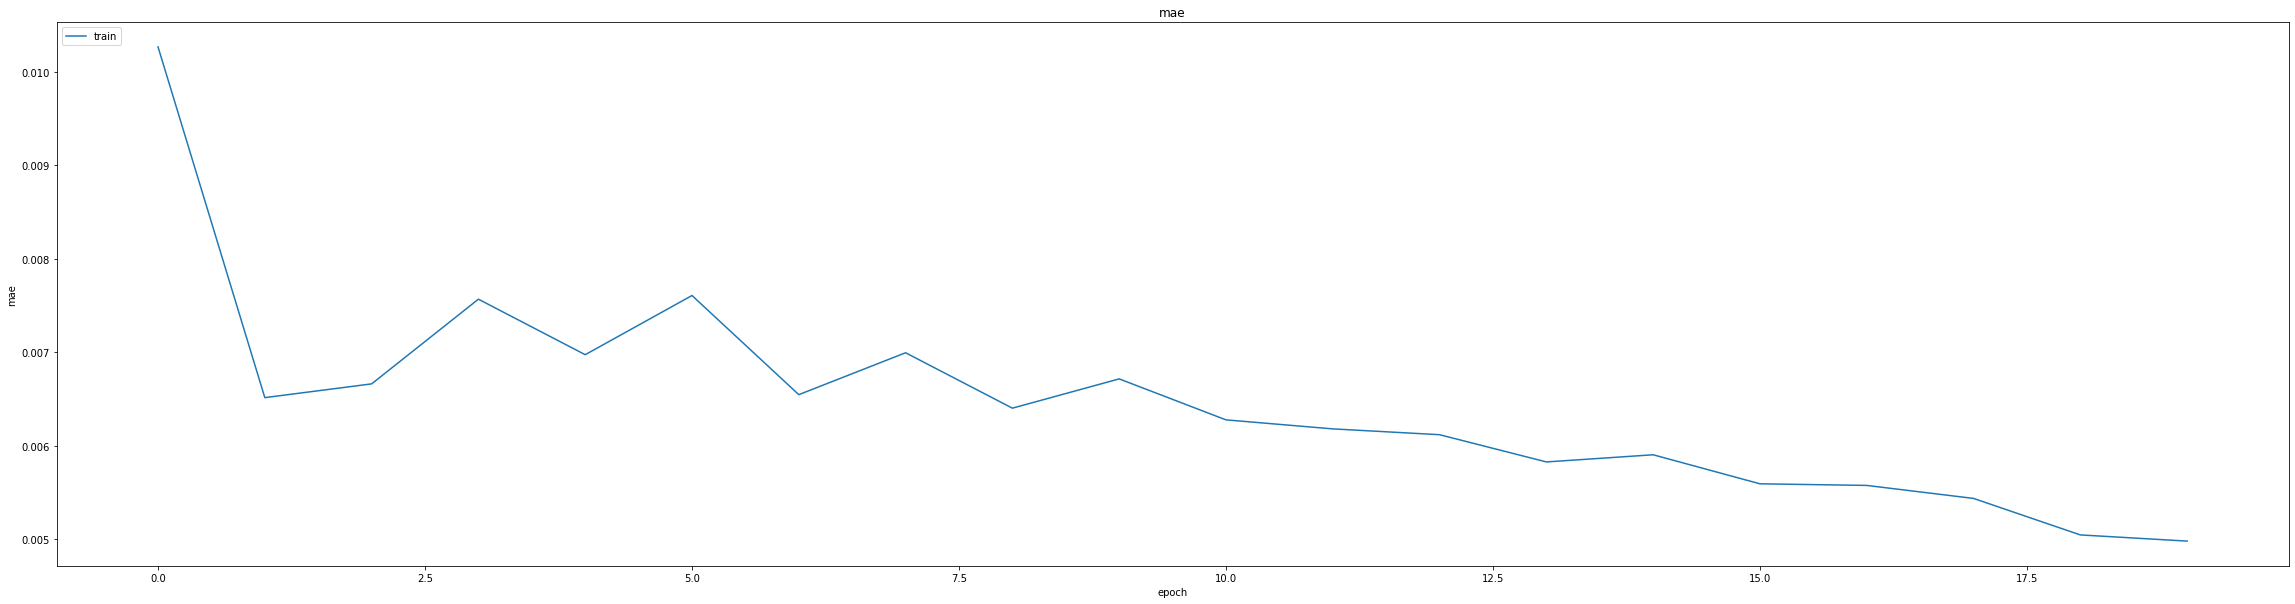

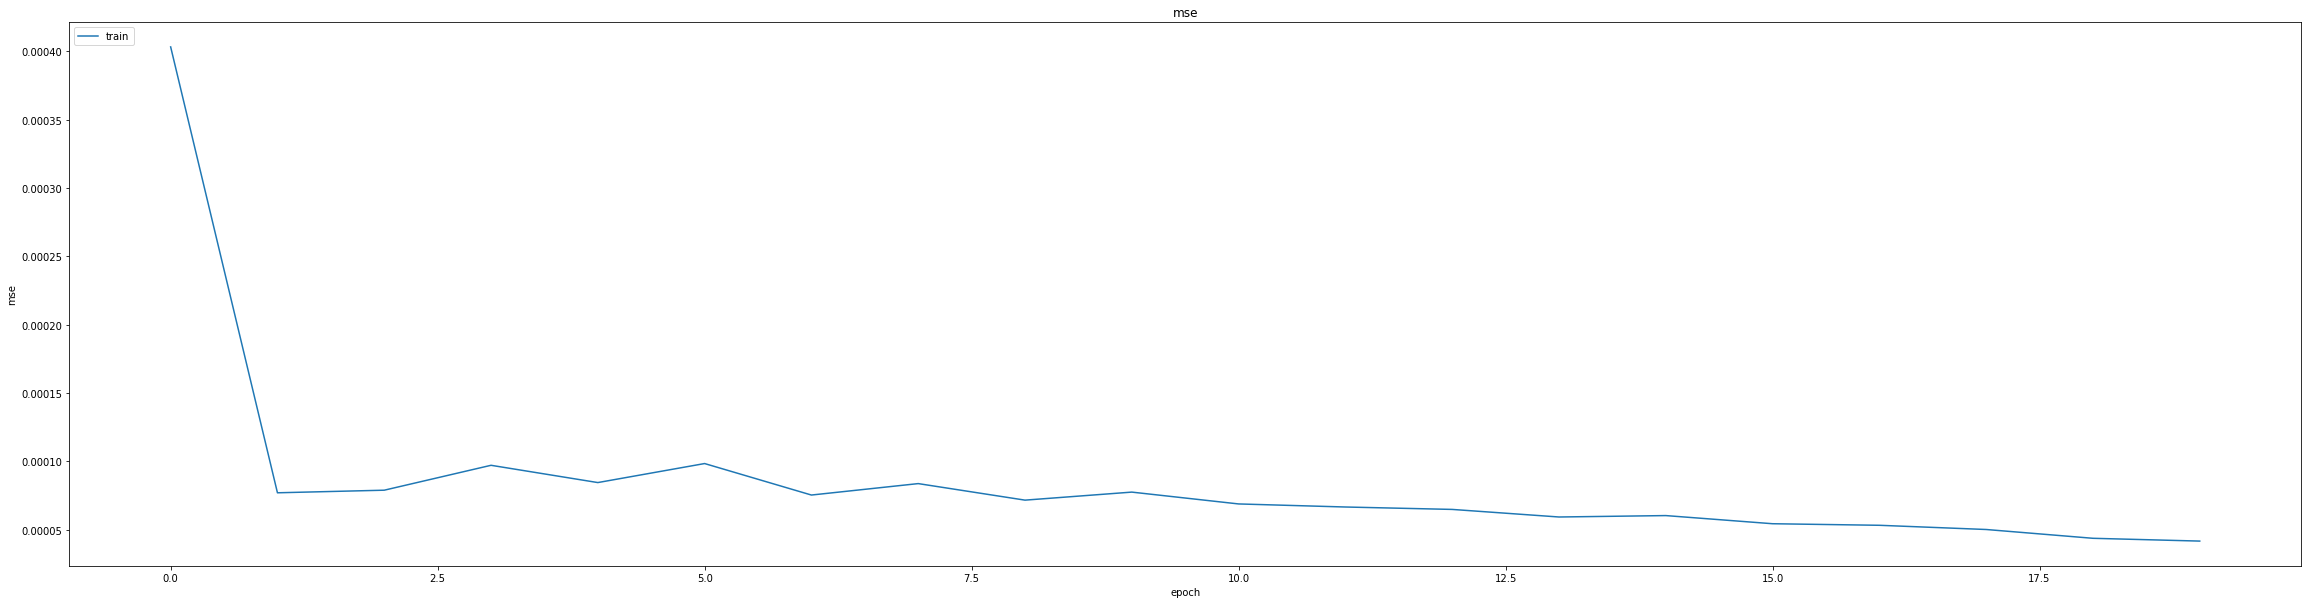

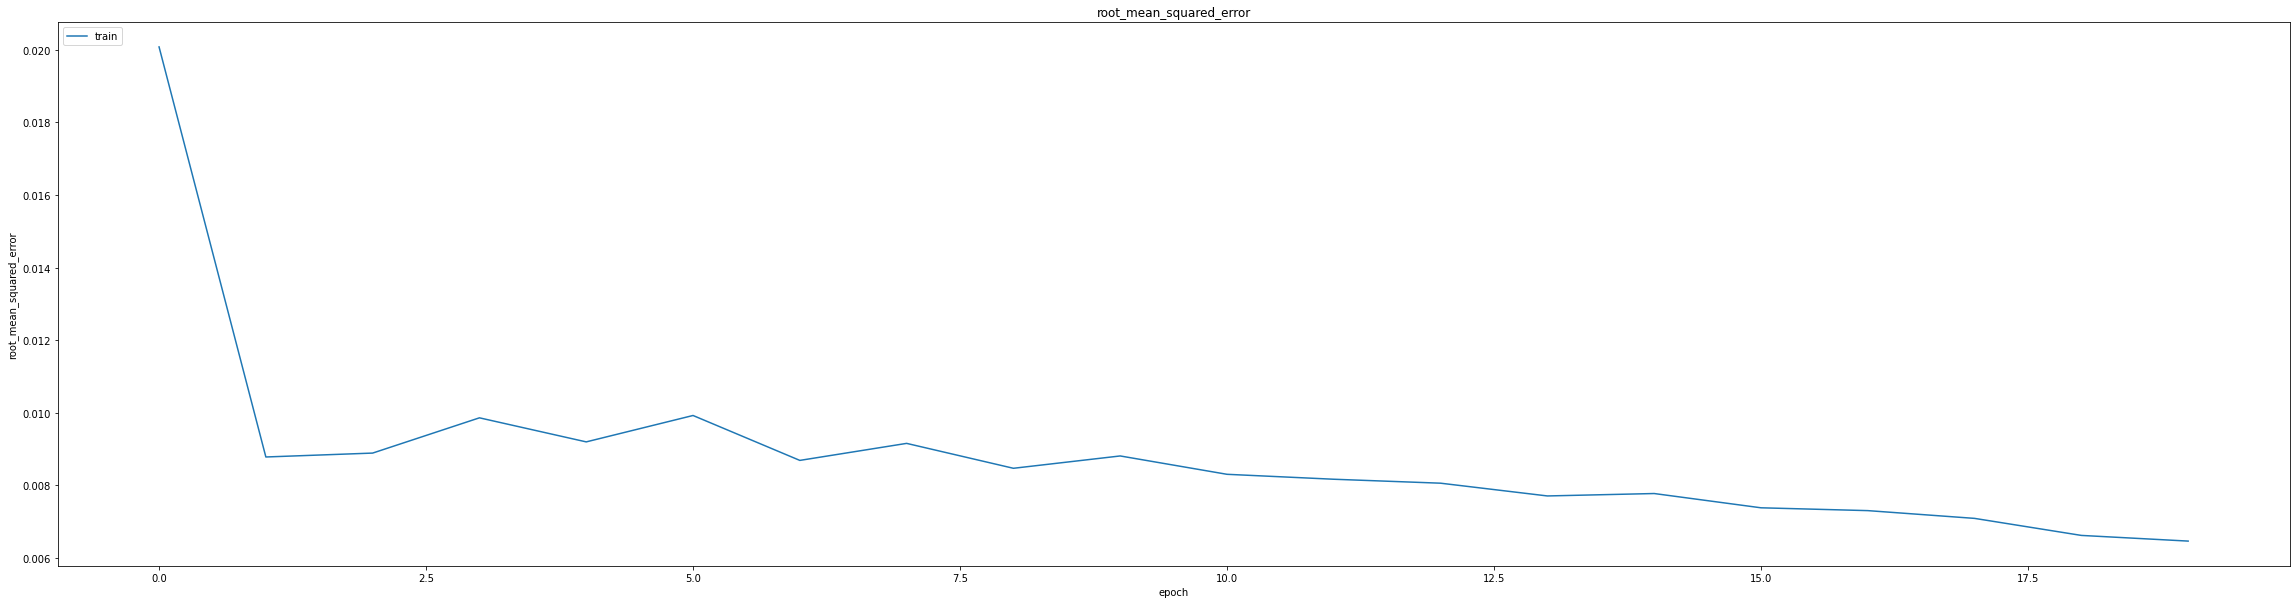

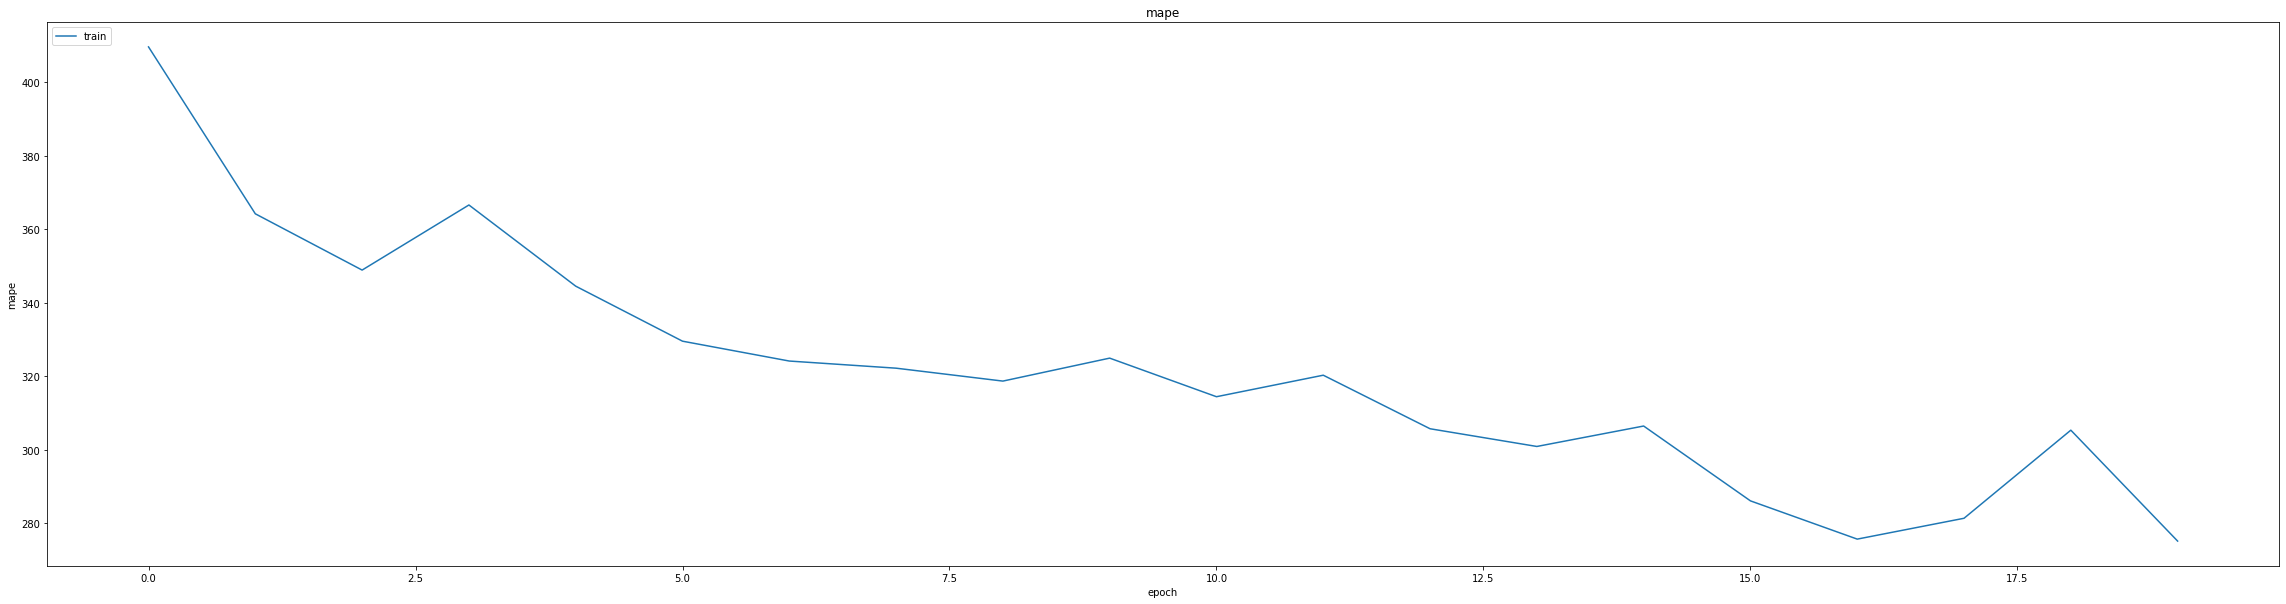

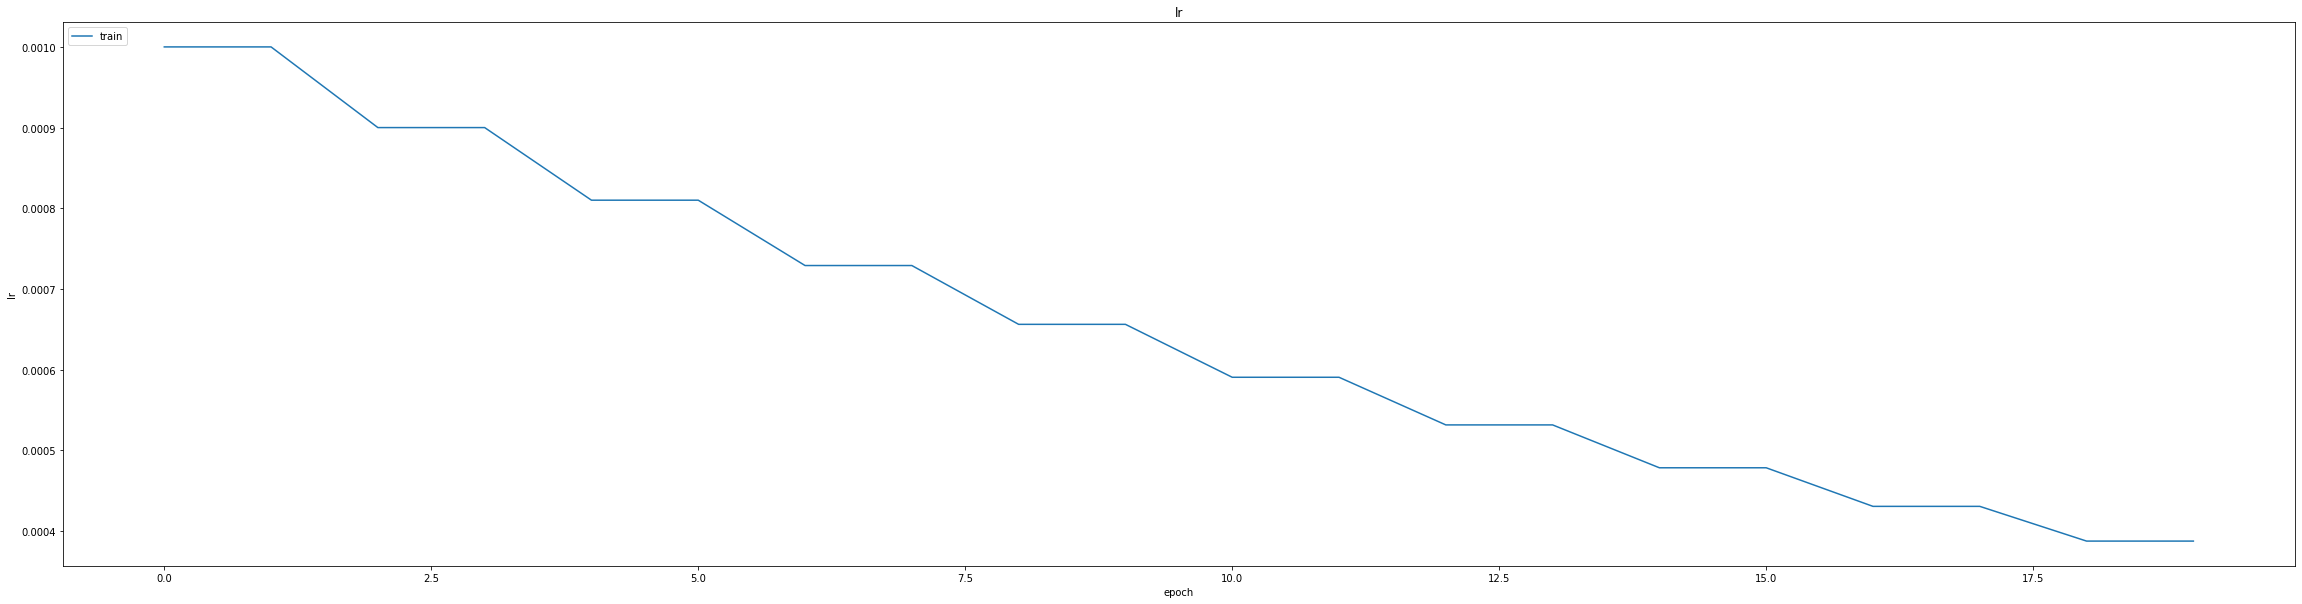

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015174631029367447
0.01965864561498165
687/687 [==============================] - 36s 50ms/step
0.986604798849391


687/687 [==============================] - 20s 29ms/step


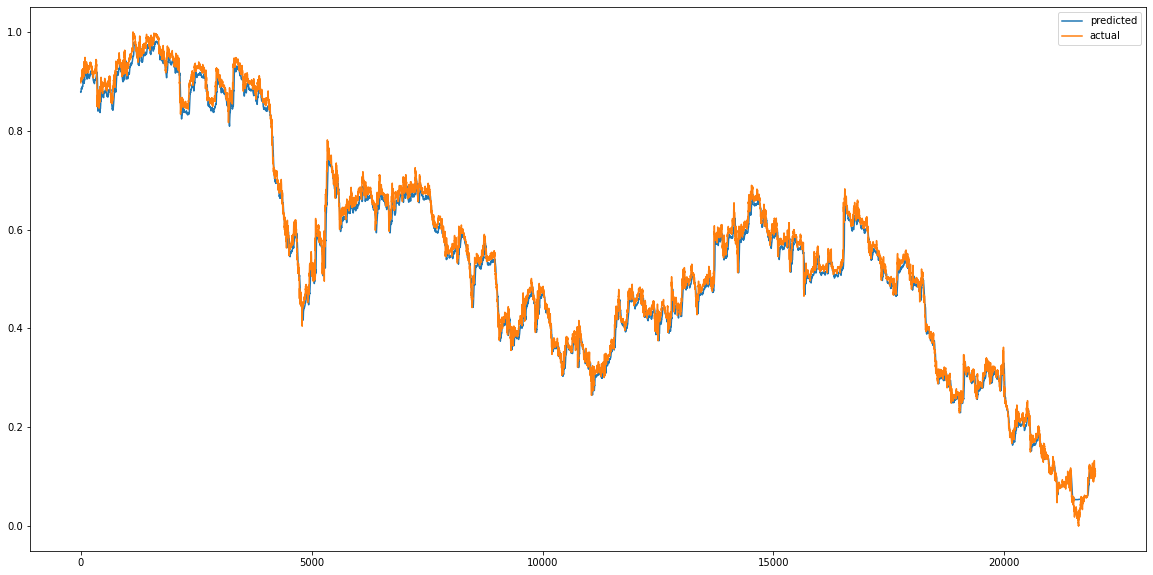

In [ ]:
model.load_weights("/content/drive/MyDrive/Thesis Dataset/GBP5minGRU1.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


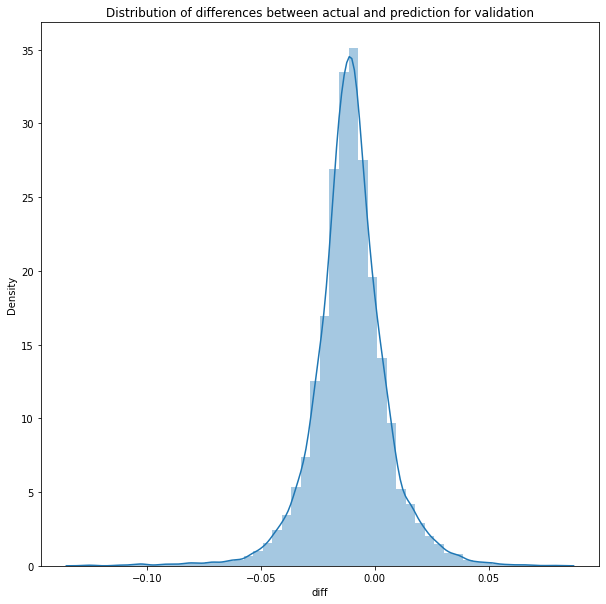

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 19s 28ms/step


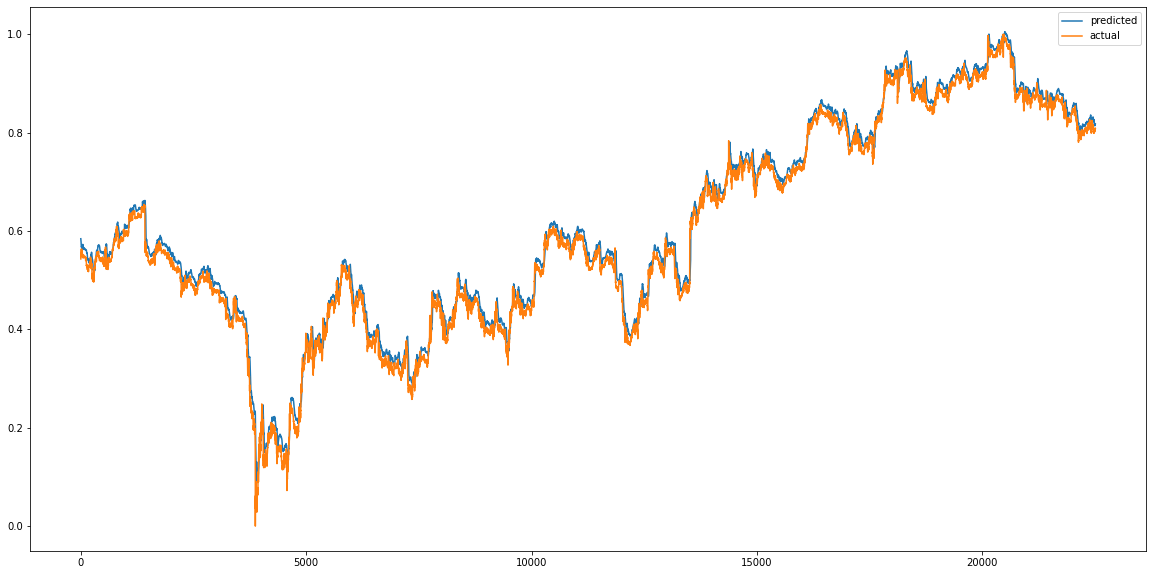

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


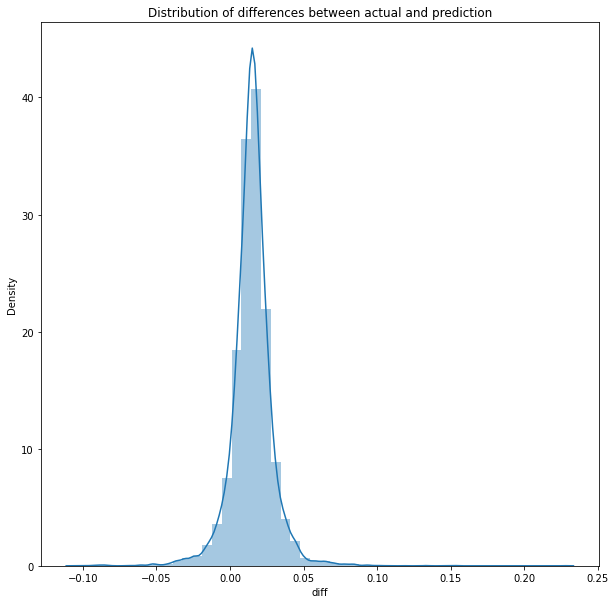

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00041596743806332416
MAE :  0.016977914411231004
RMSE  : 0.020395279798603505
704/704 [==============================] - 20s 28ms/step
R2_Score  : 0.9906607350250443


count    22508.000000
mean         0.014873
std          0.013956
min         -0.105671
25%          0.008575
50%          0.015057
75%          0.021356
max          0.227715
Name: diff, dtype: float64